# Assignment 2 - part 2

## Convolutional neural network

Use the training and evaluation pipeline developed in part 1 to train and evaluate two CNN models.
The first shall be composed of standard convolutional layers, non-linaerities, and pooling layers of your choice. The second shall include skip connections. For this you shall develop your own ResidualBlack as a new layer under the nn.Module super-class. 

### Train and apply model

Train the two models. Try different values of the hyper-paramter settings. You shall achieve at least 93% test accuracy with your best model.

Describe briefly your two models and your hyper-parameter setups and comment your results.

**Compare the performance of the two models and the three feed forward models using suitable supportive tables and graphs, and complemented by relevant comments.**


# Data Preparation

In [8]:

import torch
import torchvision
from torch.utils.data import DataLoader, TensorDataset

torch.manual_seed(0)

train_dataset = torchvision.datasets.FashionMNIST('data/train', train=True, download=True)
test_dataset = torchvision.datasets.FashionMNIST('data/test', train=False, download=True)
train_dataset.data = train_dataset.data.to(torch.float)
test_dataset.data = test_dataset.data.to(torch.float)

data = dict()
data["x"] = train_dataset.data
data["y"] = train_dataset.targets
data["x_test"] = test_dataset.data
data["y_test"] = test_dataset.targets

batch_size = 64
train_set = TensorDataset(data["x"], data["y"])
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
output_dim = len(train_dataset.classes)

# Training

In [9]:
from models.cnn1 import CnnModel1
from models.cnn2 import CnnModel2

# untrained models
cnn_model1 = CnnModel1(output_dim)
cnn_model2 = CnnModel2(output_dim)

# Model Descriptions

In [10]:
print(cnn_model1)

CnnModel1(
  (model): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=valid)
    (1): ReLU()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=valid)
    (4): ReLU()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=400, out_features=100, bias=True)
    (8): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Dropout(p=0.25, inplace=False)
    (11): Linear(in_features=100, out_features=50, bias=True)
    (12): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU()
    (14): Dropout(p=0.25, inplace=False)
    (15): Linear(in_features=50, out_features=20, bias=True)
    (16): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (17): ReLU()
    (18): Dropout(p=0.25, inplace=False)
    (19

In [11]:
print(cnn_model2)

CnnModel2(
  (model): Sequential(
    (0): ResidualBlock(
      (block1): Sequential(
        (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU()
      )
      (residual): Conv2d(1, 16, kernel_size=(1, 1), stride=(1, 1))
    )
    (1): ResidualBlock(
      (block1): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU()
      )
      

CnnModel1 before training
Accuracy on the 10 examples: 0.0


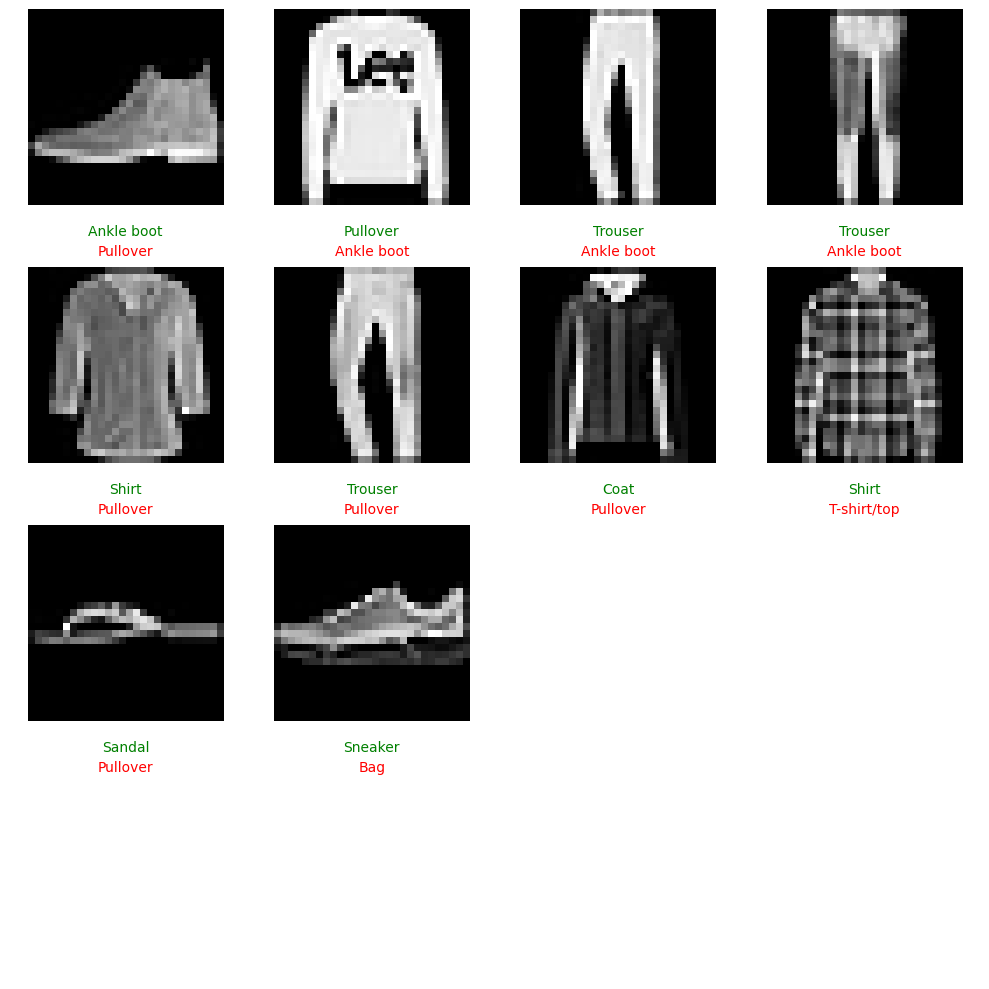

CnnModel2 before training
Accuracy on the 10 examples: 0.0


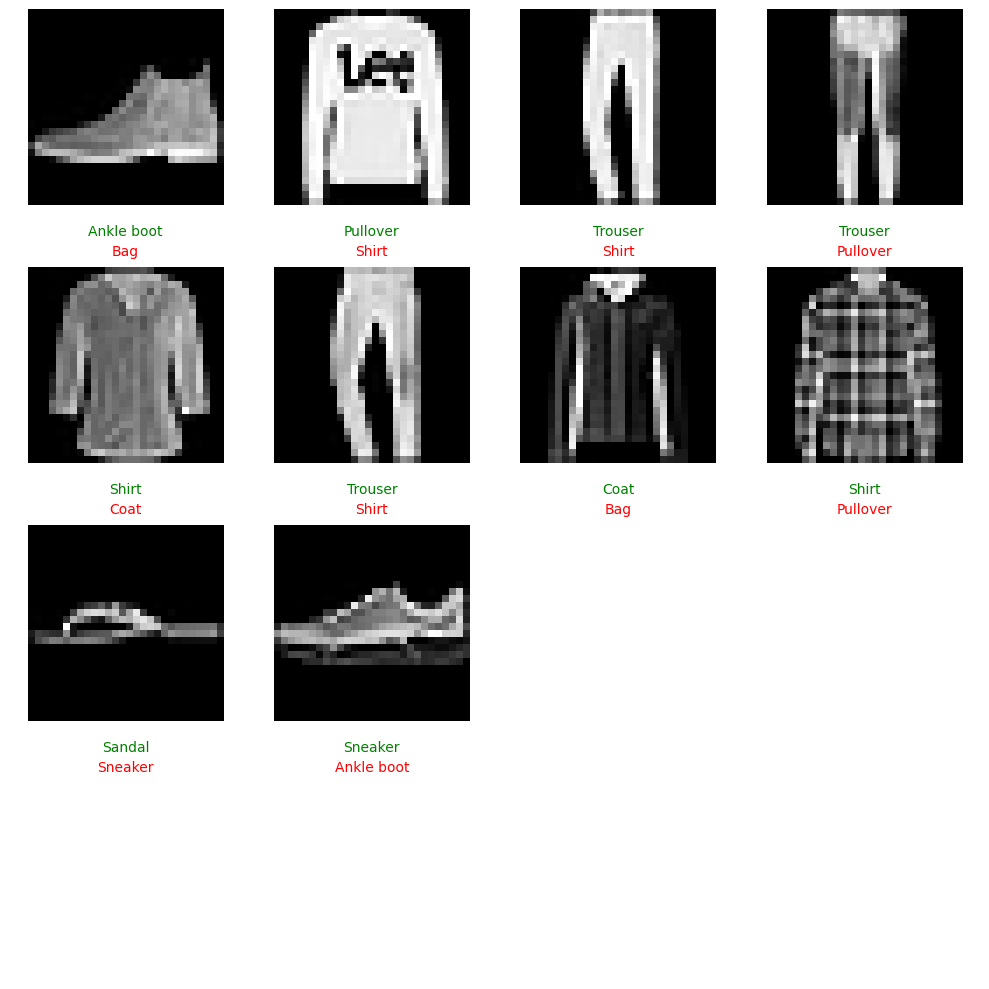

In [12]:
# define function mlp_train so that it can be run from this cell
from utils import mlp_apply

test_indexes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # list of 10 indexes - examples to extract from test set

# Before training
print(f"{type(cnn_model1).__name__} before training")
mlp_apply(cnn_model1, test_indexes, test_dataset)
print(f"{type(cnn_model2).__name__} before training")
mlp_apply(cnn_model2, test_indexes, test_dataset)

In [13]:
from utils import plot_model_metrics
from train import mlp_train


def train_plot_model(model):
    model, model_metrics = mlp_train(model, train_loader, test_dataset,
                                     learning_rate=0.0001,
                                     max_epochs=100)
    plot_model_metrics(model_metrics)
    model_train_accuracy = model_metrics["train_accuracies"][-1]
    model_test_accuracy = model_metrics["test_accuracies"][-1]
    print(f"{type(model).__name__} after training")
    print(f"Train Accuracy: {model_train_accuracy}")
    print(f"Test Accuracy: {model_test_accuracy}")
    return model


In [ ]:
train_plot_model(cnn_model1)
mlp_apply(cnn_model1, test_indexes, test_dataset)

In [ ]:
train_plot_model(cnn_model2)
mlp_apply(cnn_model2, test_indexes, test_dataset)